<a href="https://colab.research.google.com/github/sabrinaMKE201073/Data-Analysis-with-Python-/blob/main/Part_5_DA_(Final_Lab_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install pandas matplotlib scipy scikit-learn seaborn ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np

# Import clean data
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [4]:
df.to_csv('module_5_auto.csv')

In [6]:
#this is for when we want to use only numeric data
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [7]:
#plotting libraries
from ipywidgets import interact, interactive, fixed, interact_manual

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [12]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))


    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

#Part 1: Training and Testing

- important step: **split your data into training and testing data**

In [14]:
#place target data in a separate dataframe y_data
y_data = df['price']

In [16]:
#drop price data in dataframe x_data
x_data=df.drop('price',axis=1)

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
#in this example, testing set is only for 10%

number of test samples : 21
number of training samples: 180


# Question 1:
- using "train_test_split" function to split up the dataset to 40% of the data samples for testing.
- Set the parameter "random_state" equal to zero.
- The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".

In [19]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data,
                                                        test_size=0.4, random_state=0)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [20]:
#Import LinearRegression
from sklearn.linear_model import LinearRegression

#create a linear regression model
lre=LinearRegression()

#fit model using feature "horsepower"
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [21]:
#calculate R^2 for test data
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [22]:
##calculate R^2 for training data
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

From the results of these R^2 for test and training data,
- We can see the R^2 is much smaller using the test data compared to the training data.

#Question 2:
- Find the R^2 on the test data using 40% of the dataset for testing?

In [24]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4,
                                                        random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)

LinearRegression()

In [25]:
#find R^2 for test data
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

In [27]:
#find R^2 for test data
lre.score(x_train1[['horsepower']],y_train1)

0.5754067463583004

# Cross-Validation Score

In [28]:
#import libraries
from sklearn.model_selection import cross_val_score

In [29]:
#input the object:
# >  feature (horsepower)
# >  target data (y_data)
# >  cv (no. of folds)
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [30]:
#calculate average & std
print("The mean of the folds are", Rcross.mean(),
      "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [31]:
#use negative squared error as a score
-1 * cross_val_score(lre,x_data[['horsepower']],
                     y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

# Question 3:
- Calculate the average R^2 using two folds,
- then find the average R^2 for the second fold utilizing the "horsepower" feature


In [33]:
#find R^2
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)

#find mean
Rc.mean()

0.5166761697127429

`Use 'cross_val_predict' function to predict the output`

In [35]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Overfitting, Underfitting and Model Selection

In [36]:
#create Multiple Linear Regression objects and
#train the model using the 4 things as features.

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [39]:
#predict using train data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight',
                                 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [40]:
#predict using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight',
                               'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [41]:
#Model Evaluation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

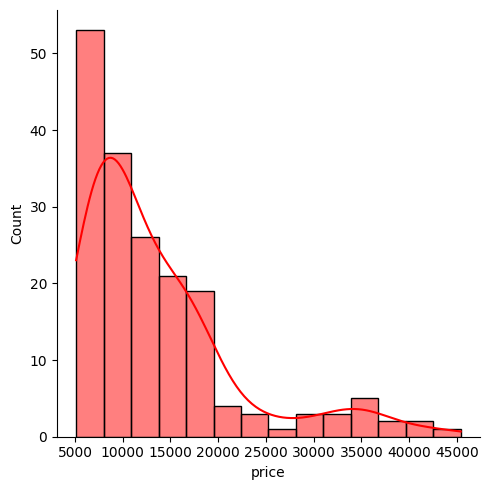

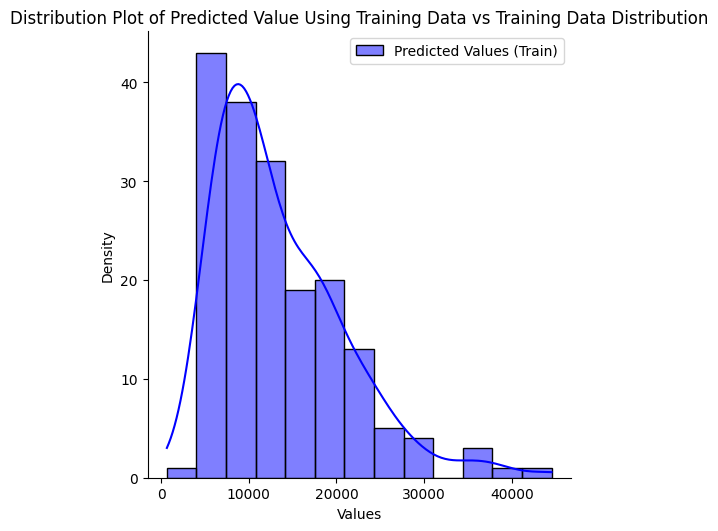

In [44]:
def DistributionPlot(actual_values, predicted_values, actual_label, predicted_label, title):
    sns.displot(actual_values, color="r", label=actual_label, kde=True)
    sns.displot(predicted_values, color="b", label=predicted_label, kde=True)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(title)
    plt.legend()
    plt.show()

# Example usage
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)


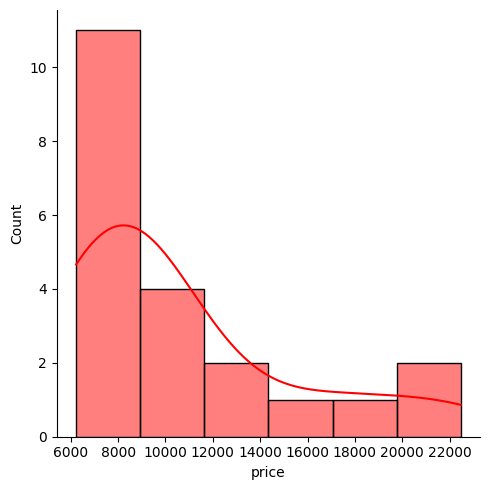

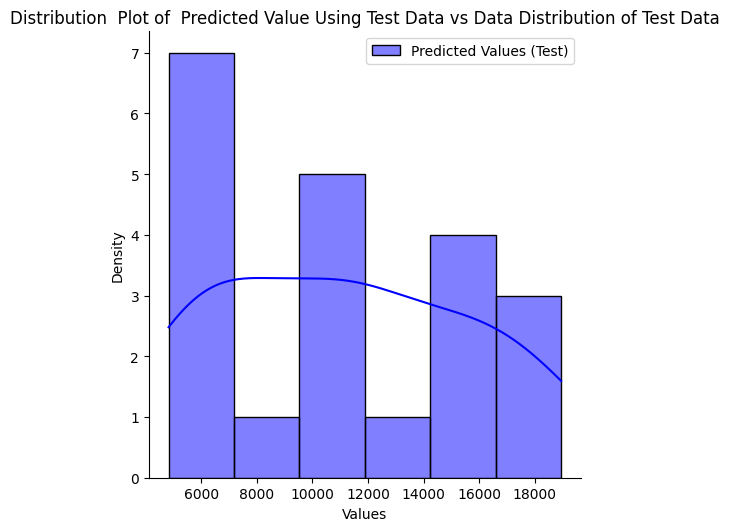

In [46]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

- Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 6000 to 18,000. This is where the shape of the distribution is extremely different.
- Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test datase

In [47]:
from sklearn.preprocessing import PolynomialFeatures

# Overfitting

- occurs when the model fits the noise, but not the underlying process

In [48]:
#this time, let's use 55% data for training, and 45% for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [49]:
#degree=5 polynomial transformation perform on the feature 'horsepower'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [50]:
#create a LinearRegression model "poly" and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [51]:
#predict method to get output
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [53]:
#compare first 5 predicted value & actual value
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)


Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


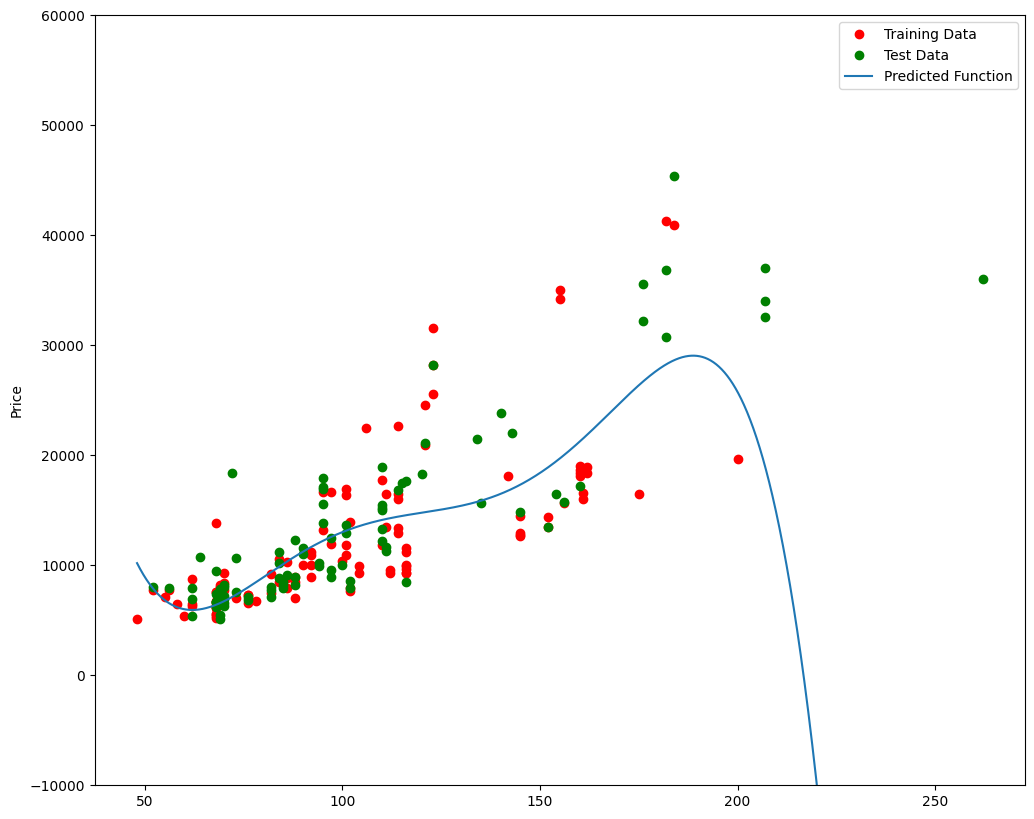

In [54]:
#use function PollyPlot that has been define earlier
#to display training data, testing data & predicted function
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [56]:
#R^2 of train data
poly.score(x_train_pr, y_train)

0.5567716902120254

In [57]:
#R^2 of test data
poly.score(x_test_pr, y_test)

-29.871340302043684

- We see the R^2 for the training data is 0.56
while the R^2 on the test data was -29.87.
- The lower the R^2, the worse the model.
- A negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2 ')

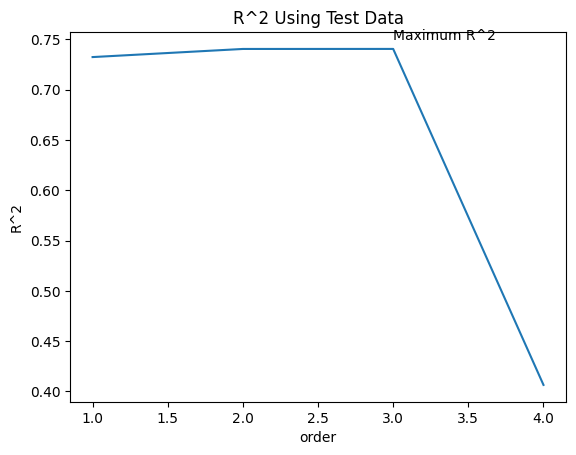

In [58]:
#different order of polynomial, lets see the graph
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train[['horsepower']])

    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr.fit(x_train_pr, y_train)

    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

from this graph,
- We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial

In [59]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

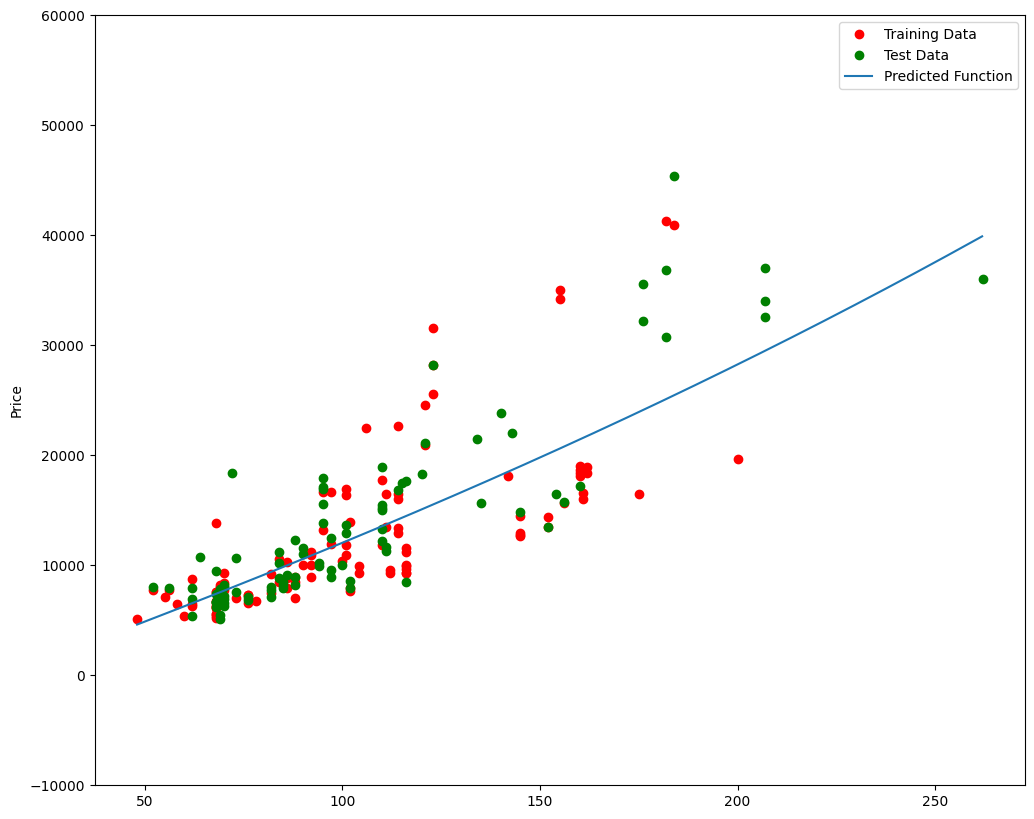

In [60]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

#Question 4:

- We can perform polynomial transformations with more than one feature.
- Create a "PolynomialFeatures" object "pr1" of degree two.

In [61]:
pr1=PolynomialFeatures(degree=2)

# Question 4b:

- Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'.
- (Hint: use the method "fit_transform")

In [62]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

#Question 4c:

- How many dimensions does the new feature have?
- (Hint: use the attribute "shape")

In [64]:
x_train_pr1.shape
#15 features

(110, 15)

#Question 4d:

- Create a linear regression model "poly1".
- Train the object using the method "fit" using the polynomial features.

In [66]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1,y_train)

LinearRegression()

#Question 4e:

- Use the method "predict" to predict an output on the polynomial features,
- then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.

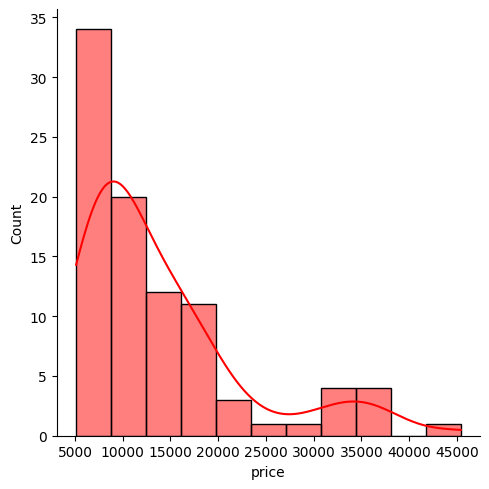

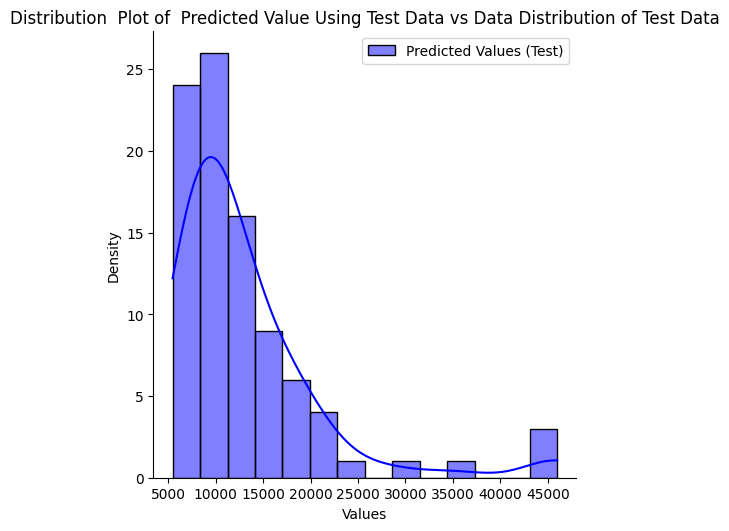

In [67]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

#Question 4f:

- Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.

- The predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the 30,000 to 40,000 range. As such the model is not as accurate in these ranges.

# Ridge Regression

In [68]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [69]:
#import Ridge
from sklearn.linear_model import Ridge

In [70]:
#create a Ridge regression object
RigeModel=Ridge(alpha=1)

In [71]:
#fit model
RigeModel.fit(x_train_pr, y_train)

#obtain prediction
yhat = RigeModel.predict(x_test_pr)

In [72]:
#compare the first 5 predicted samples compared to our test dataset
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [73]:
#select the value alpha to minimize error
#using for loop, create a progress bar to see how many iterations
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:07<00:00, 135.47it/s, Test Score=0.564, Train Score=0.859]


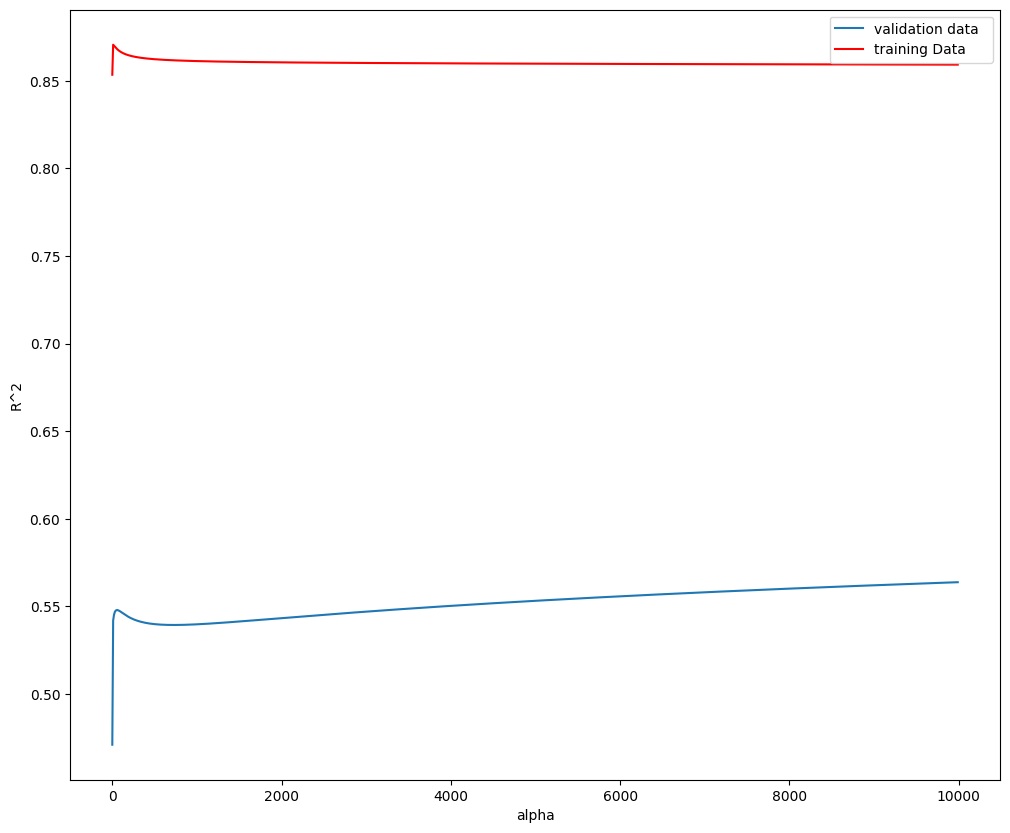

In [74]:
#plot the value of R^2 for different alpha
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

- From the plot
  - the blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data.
  - The x-axis represents the different values of Alpha

- Results:
  - The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

  - The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

#Question 5: Perform Ridge Regression

- Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model.

- The parameter alpha should be set to 10.

In [75]:
RigeModel = Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206506

# Grid Search

In [76]:
from sklearn.model_selection import GridSearchCV

#create dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [77]:
#Create Ridge Regression object
RR=Ridge()
RR

Ridge()

In [80]:
#Create a rdge grid search object
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [81]:
#fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [82]:
#finds the best parameter values on the validation data.
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [83]:
#test our model on the test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

#Question 6
- Perform a grid search for the alpha parameter and the normalization parameter,
- then find the best values of the parameters:

In [85]:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
Grid2.best_estimator_


Ridge(alpha=10000)